In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Assignment 1

This assignment is mostly about refreshing your Python skills from last semester and introducing you to the concept of matrices. Matrices were briefly covered as optional material in Chapter 10.6 of the PHYS 144 lab manual (which we have cross-posted to PHYS 146 in case you do not have a copy).

This assignment is pass/fail so as long as you put some effort into answering each question, you'll receive full marks.

## Q1 - Creating Lists


---


Initiate a list called “x” and populate it with 20 random numbers between 1 and 15 using Python.  Print “x” and its length.  Now construct a new list called “y” such that each element in “y” is simply the difference between the corresponding and the subsequent elements in “x”.  In other words: $y(i) =x(i)−x(i+ 1)$.  Will x and y have the same dimension (length)?  If not, what do you expect the dimension of y to be?  (Hint:  You might want to start with an empty y-array and then add elements using a “for” or “while” loop).

In [6]:
minimum_num = 1
maximum_num = 15
size = 20

x = np.random.randint(minimum_num, maximum_num, size=size)
y = np.array([])

# Loop through the array until the second to last element
for i in range(len(x) - 1):
    diff = x[i] - x[i+1]
    y = np.append(y, diff)

print("x", x)
print("y", y)

x [12  1  2  6 11 10  5 13  4  5  4  8 11  7  5  6  3  7 13  5]
y [11. -1. -4. -5.  1.  5. -8.  9. -1.  1. -4. -3.  4.  2. -1.  3. -4. -6.
  8.]


## Q2A - Linear Fit


---


Use the provided code to generate a dataset. Then, using a linear fitting routine to find the slope, intercept, and their uncertainties.

In [8]:
sampleX = np.linspace(0, 50, 26) + np.random.normal(scale = 0.2, size = 26)
sampleY = 3 * sampleX + 4 + np.random.normal(scale = 4, size = 26)

In [9]:
fitpar, uncertainty = np.polyfit(sampleX, sampleY, deg=1, cov=True)

slope = fitpar[0]
slope_uncertainty = np.sqrt(uncertainty[0, 0])

intercept = fitpar[1]
intercept_uncertainty = np.sqrt(uncertainty[1, 1])

print(f"Slope: {slope:.2f} +/- {slope_uncertainty:.2f}")
print(f"Intercept: {intercept:.2f} +/- {intercept_uncertainty:.2f}")

Slope: 2.94 +/- 0.06
Intercept: 6.03 +/- 1.85


## Q2B - Plotting 1


---


Plot the data from the previous question along with a trendline. Make sure to include proper labels on the axes, but you do not require a title or caption for this plot.

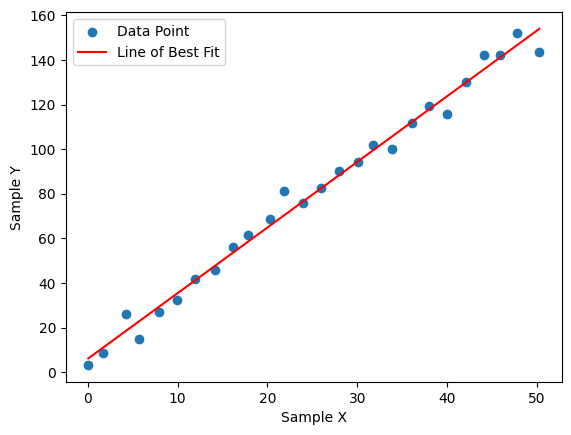

In [10]:
# Calculate the trend line to plot
x = np.linspace(sampleX[0], sampleX[-1], 100)
y = slope * x + intercept

plt.scatter(sampleX, sampleY, label="Data Point")
plt.plot(x, y, linestyle="-", color="red", label="Line of Best Fit")

plt.xlabel("Sample X")
plt.ylabel("Sample Y")
plt.legend(loc="best")
plt.show()

## Q3 - Plotting 2


---


Create a plot of $P(z) = P_0 e^{-\frac{z}{H}}$ for $z$ from 0 km to 20 km, where $H = 8.5\textrm{ km}$ and $P_0 = 101.325\textrm{ kPa}$. This equation represents the pressure of Earth's atmosphere at a given altitude. Draw horizontal lines on the graph at pressure values of 101.325 kPa/e and 101.325 kPa/e**2, and vertical lines at 8.5 km and 17 km. Notice that every 8.5 km, the pressure drops to 1/e of its previous value. You may want to use plt.axvline() and plt.axhline() to draw these extra lines. Make sure to include axis labels, but a title and caption are not required.

We refer to 8.5 km as the scale height of Earth's atmosphere. In physics, we often encounter situations where there is no "hard edge". There is no definitive point at which we can say atmosphere lies on one side and space lies on the other. To deal with this, we define "characteristic" parameters such as the distance it takes pressure to fall to 1/e of its original value or, as in half-life, the time it takes for the number of particles to decay to 1/2 of its original value.

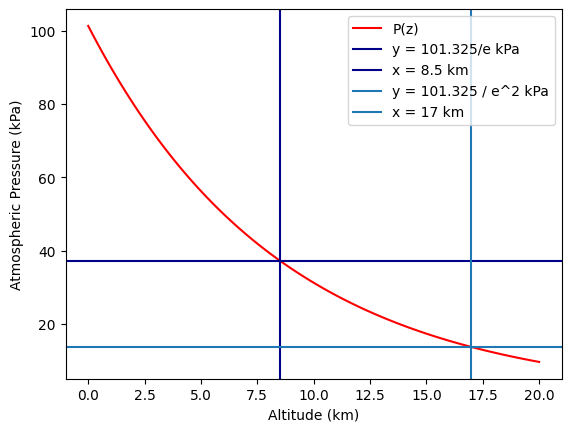

In [11]:
def P(z):
    """
    Calculates the pressure of Earth's atmosphere at a given altitude z
    z       - distance in km
    returns - pressure in kPa
    """
    P_0 = 101.325 # kPa
    H = 8.5 # km
    return P_0 * np.exp(-z / H)

start = 0 # km
end = 20 # km
created_x = np.linspace(start, end, 100)
created_y = np.array([P(z) for z in created_x])

plt.plot(created_x, created_y, linestyle="-", color="red", label="P(z)")

# Draw lines across plot
plt.axhline(101.325 / np.exp(1), color="darkblue", label="y = 101.325/e kPa")
plt.axvline(8.5, color="darkblue", label="x = 8.5 km")

plt.axhline(101.325 / np.exp(2), label="y = 101.325 / e^2 kPa")
plt.axvline(17, label="x = 17 km")

plt.legend(loc="best")
plt.xlabel("Altitude (km)")
plt.ylabel("Atmospheric Pressure (kPa)")
plt.show()

## Q4 - Matrices 1


---


Matrices are a fundamental part of both physics and programming. In PHYS 144, you learned how to create lists such as `[1, 2, 3, 4, 5]` or `np.arange(10)`. In some languages these are also called vectors or arrays. Lists may also contain other lists. These may have ragged edges like `[[1, 2], [3, 4, 5], [6, 7, 8 ,9]]`, or they may be rectangular like `[[1, 2, 3], [4, 5, 6]]`. If a list is rectangular (in 2D or higher), we call it a matrix. Matrices can be in any dimensions that are necessary, but most commonly we deal with 2D or 3D matrices.

Since a matrix is effectively a "list of lists", we can use the same indexing techniques for lists to extract parts of a matrix. Keeping in mind that Python begins indexing with 0, then `myMatrix[m, n]` would give you the value from the $m^{th} + 1$ row, and the $n^{th} + 1$ column. To extract a slice of the matrix, we could use `myMatrix[:5, 5:10]` to extract a smaller matrix that consists of entries from `myMatrix` that lie at the intersection of rows 1 through 5 (indices 0 through 4) and columns 6 through 10 (indices 5 through 9). You can also specify a list of indices such as `myMatrix[:, [5, 10, 15]]` which would return all the entries in columns 6, 11, and 16.

Use the following code to generate a 5 x 5 matrix of the numbers from 1 to 25. Then, complete the following steps:

1. Print the matrix.
2. Show the code necessary to print only the number 17 from the matrix (`print(17)` is obviously not acceptable)
3. Slice the matrix such that it only prints the first, third, and last rows.
4. Slice the matrix such that it only prints the second and fourth columns.
5. Slice the matrix such that it only prints a 3 x 3 matrix with the number 7 in the top left corner.

In [12]:
mat = np.arange(1, 26).reshape(5, 5)

In [24]:
print(mat) # Print the matrix
print(mat[3, 1]) # Print the entry containing 17
print(mat[[0, 2, -1]]) # Print the first, third and last row
print(mat[:, [1,3]]) # Print the second and fourth column
print(mat[1:4, 1:4]) # Print the 3x3 matrix with the entry 7 in the top left corner


[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]]
17
[[ 1  2  3  4  5]
 [11 12 13 14 15]
 [21 22 23 24 25]]
[[ 2  4]
 [ 7  9]
 [12 14]
 [17 19]
 [22 24]]
[[ 7  8  9]
 [12 13 14]
 [17 18 19]]


## Q5 - Matrices 2


---


There are two common ways of multiplying matrices: element-wise multiplication and matrix multiplication. Use `np.dot()` (or any other matrix multiplication routine that you like) to multiply the matrix from the previous question with itself. Then, using regular multiplication (or exponentiation), multiply the matrix from the previous question with itself. What is the difference between the two methods? If you're not quite sure what `np.dot()` is doing, you can look it up in the NumPy documentation.

In [ ]:
matrix_mult = np.dot(mat, mat)
element_mult = mat * mat

print(matrix_mult) # Multipies the matrices using the dot product between the row and column
print(element_mult) # Multiplies elements at the same indices together

[[ 215  230  245  260  275]
 [ 490  530  570  610  650]
 [ 765  830  895  960 1025]
 [1040 1130 1220 1310 1400]
 [1315 1430 1545 1660 1775]]
[[  1   4   9  16  25]
 [ 36  49  64  81 100]
 [121 144 169 196 225]
 [256 289 324 361 400]
 [441 484 529 576 625]]


## Q6 - Matrices 3


---

Create a double `for` loop that goes through a randomly generated matrix and counts (and prints) the number of threes that appear in the matrix. This code samples from a uniform distribution so think about how many threes you would expect to see.

**Optional (not for marks):** Another way to count these (as long as your matrix is a NumPy matrix) would be `(randMat == 3).sum()`. If you're curious about how that works, try generating a smaller matrix like `smallMat = np.random.randint(1, 11, size = (10, 10))` and then `smallMat == 3` to see what you get. You might be surprised that summing the result matrix works, but in Python `True` is equivalent to 1 in many cases and `False` equivalent to 0. There are often these sorts of 'terse' codes which can greatly reduce the typing required to achieve a result. In some cases, they can also be faster. However, for now we mostly want to emphasize how to use the `for` loop to loop through the matrix.

In [27]:
randMat = np.random.randint(1, 101, size = (100, 100))

In [38]:
numThrees = 0
for row in randMat:
    for value in row:
        if value == 3: 
            numThrees += 1

print(numThrees, "threes found.")

101 threes found.


## Q7A - Matrices 4


---

Two things that we commonly need to deal with are loading (or saving) data and data files that are presented as matrices. Load the CSV provided on eClass which contains 3 spectra collected from a spectrometer. This CSV has a header row that contains the titles for each column of data. The goal is to plot all of the spectra contained in the CSV on a single graph and add a legend. Because some of the data overlap, you may want to make the first spectrum a solid line, and the second and third dashed lines.

**Optional Reading:** This information isn't necessary to complete the assignment, but does provide some background information on what you're seeing. The first spectrum (with both tall and short peaks) is from a fluorescent chemical inside the hollow channel of a glass capillary tube. When the fluorescent chemical by short-wavelength light (often blue or UV light, but we used 500 nm light from a nitrogen-pumped dye laser here), the chemical will glow and emit its own light (think back to your experiments with diffraction in PHYS 144). While atoms and gases tend to have emit discrete spectal lines, the chemical used here is a fairly large molecule. As such, it emits light over a continuous range of wavelengths.

However, if you trap the chemical inside an optical cavity and use a strong enough excitation pulse, you can actually create a laser. Some of the photons emitted from the fluorescent chemical will be trapped inside the circular cavity by total internal reflection. They will continue to bounce off the inside of the capillary, stimulating emission of even more photons. Only certain wavelengths of light will be effectively trapped inside the capillary. This creates the peaks that we see in the spectrum—these are the wavelengths that get trapped in the cavity and their energy builds up. While we still have fluorescence at all wavelengths from about 560 nm to 640 nm, the laser peaks are much more intense.

We capture this light using a spectrometer very similar to the Ocean Optics spectrometer you used in PHYS 144. If you look closely at the spectrum, you will notice that there are a series of short peaks and a series of taller peaks. This is a result of transverse magnetic (TM) and transverse electric (TE) modes circulating around the edge of the capillary. Light is composed of oscillating electric and magnetic fields that are at 90 degrees to one another. When the electric field oscillates parallel to the surface of the sphere (and thus the magnetic field oscillates radially) we call it TE. The other case, where the magnetic field oscillates parallel to the surface of the capillary is called TM. We can use a polarizer in front of the spectrometer to only capture either TE or TM light which is where the second and third spectra come from; they're just the original spectrum with either TE or TM light filtered out.

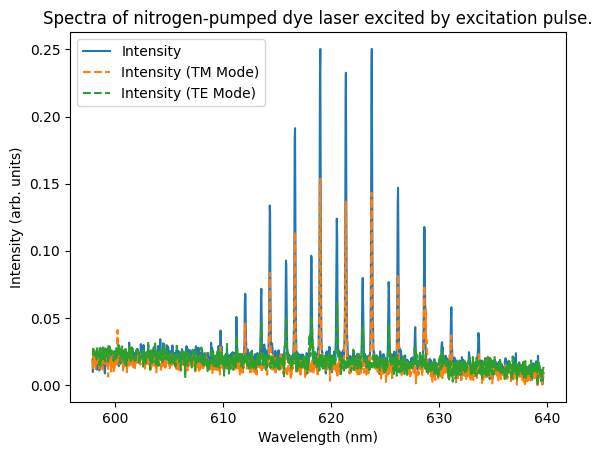

In [ ]:
# load the data using pandas
import pandas as pd
spectra_data = pd.read_csv("PHYS 146 Spectra.csv")

# create numpy arrays of each column
wavelength = np.array(spectra_data["Wavelength (nm)"])
intensity = np.array(spectra_data["Intensity (arb. units)"])
tm_intensity = np.array(spectra_data["TM Mode Intensity (arb. units)"])
te_intensity = np.array(spectra_data["TE Mode Intensity (arb. units)"])

# plot each spectrum
fig = plt.figure()
plt.plot(wavelength, intensity, label="Intensity")
plt.plot(wavelength, tm_intensity, linestyle="--", label="Intensity (TM Mode)")
plt.plot(wavelength, te_intensity, linestyle="--", label="Intensity (TE Mode)")

# add plot details
plt.title("Spectra of nitrogen-pumped dye laser excited by excitation pulse.")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity (arb. units)")
plt.legend(loc="best")

plt.show()

## Q7B - Exporting Graphs


---

A common issue with generating figures in Python, especially when running Python in the cloud rather than on your local machine, is how to get high-quality figures. Include code here that allows you to save the figure from 7A with high-resolution. While you do not need to submit the exported graph, it's a good idea to make sure it's actually exporting the graph you want and that you know how to retrieve the exported graph. This will come in handy when submitting your report for your project. Unreadable, low-resolution graphics will be docked points in the final report.

There are a couple of different ways of doing this, but we're not going to give you the functions right away. An important skill in coding is being able to find the answer in the documentation or by searching. If you're struggling to find to find the answer even after searching, you can always ask your TA.

In [60]:
fig.savefig("spectra_plot.png", dpi=300)